In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import STOPWORDS, WordCloud
import nltk

In [ ]:
# nltk.download()

In [ ]:
all_data = pd.read_csv('./csv/riss_bigdata.csv', encoding='utf-8')
all_title = all_data['제목']
all_title

In [ ]:
stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
words = []

for title in all_title:
    EnWords = re.sub(r'[^A-Za-z]',' ', str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [ ]:
words

In [ ]:
from functools import reduce

words2 = list(reduce(lambda x, y : x+y, words))

In [ ]:
words2

In [ ]:
from collections import Counter

count = Counter(words2)

word_count = dict()

for tag, counts in count.most_common(50):
    if( len(str(tag))> 1):
        word_count[tag] = counts

word_count

In [ ]:
import matplotlib.pyplot as plt

sorted_Keys = sorted(word_count, key = word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()


In [ ]:
del word_count['big']
del word_count['data']

In [ ]:
strpwords = set(STOPWORDS)
wc = WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import pytagcloud


f = open('data.txt', encoding='utf-8')
data = f.read()
f.close()

nlp = Okt()
nouns = nlp.nouns(data)
count = Counter(nouns)
tag2 = count.most_common(10)
tag2

In [ ]:
taglist = pytagcloud.make_tags(tag2, maxsize=50)
pytagcloud.create_tag_image(taglist,
                            'pytag_word.png',
                            size=(640,480),
                            fontname='Korean',
                            rectangular=False)

In [29]:
import requests as req
from bs4 import BeautifulSoup
import urllib
import pandas as pd

# getVillageWaterQuality , getGugunDong
def call_getVillageWaterQuality():
    url = 'http://apis.data.go.kr/6260000/TownWaterQualityService/getVillageWaterQuality'
    params ={'serviceKey' : 'l9KDvSgYZZPF7NGBPKjJgV6/pU+fhBakLsJSW1avERVypdf2WAD6J4uaF5XHRhOYdZnLhUFU/XFa5W8z+5wGqw==', 
            'pageNo' : '1', 
            'numOfRows' : '745',
            'resultType' : 'json', 
            # 'argGugun' : '710', 
            # 'argHjd' : '330' 
            }

    res = req.get(url, params=params)
    # print(res.json())
    
    global df_quailty
    df_quailty = pd.DataFrame(res.json()['getVillageWaterQuality']['item'])
    df_quailty.rename(columns = {'argGugun' : 'siguCd', 'argHjd' : 'dongCd'}, inplace = True)
    df_quailty.to_csv('./csv/busanwater_nums.csv', encoding='utf-8-sig')
    # {'getVillageWaterQuality': 
    #     {'header': {'code': '00', 'message': 'NORMAL_CODE'}, 
    #      'item': [{'orgAreaNm': '명장정수장', 'gb': '정수장', 'ph': '6.79', 'td': '점검중', 'jy': '0.62', 'ec': '-', 'tp': '-', 'sopCheck': '점검중', 'argGugun': '710', 'argHjd': '330'}, 
    #               {'orgAreaNm': '고촌배수지', 'gb': '배수지', 'ph': '7.06', 'td': '0.04', 'jy': '0.16', 'ec': '176.16', 'tp': '24.10', 'sopCheck': '정상', 'argGugun': '710', 'argHjd': '330'}, 
    #               {'orgAreaNm': '정관(택지)고지배수지', 'gb': '배수지', 'ph': '7.11', 'td': '0.09', 'jy': '0.20', 'ec': '-', 'tp': '-', 'sopCheck': '정상', 'argGugun': '710', 'argHjd': '330'}], 
    #      'numOfRows': 3, 
    #      'pageNo': 1, 
    #      'totalCount': 4}
    # }

def call_getGugunDong():
    url = 'http://apis.data.go.kr/6260000/TownWaterQualityService/getGugunDong'
    params ={'serviceKey' : 'l9KDvSgYZZPF7NGBPKjJgV6/pU+fhBakLsJSW1avERVypdf2WAD6J4uaF5XHRhOYdZnLhUFU/XFa5W8z+5wGqw==', 
            'pageNo' : '1', 
            'numOfRows' : '252',
            'resultType' : 'json'
            }
    
    
    res = req.get(url, params=params)
    # {'getGugunDong': 
    #     {'header': {'code': '00', 'message': 'NORMAL_CODE'}, 
    #      'item': [{'siguCd': '710', 'siguNm': '기장군', 'dongCd': '330', 'dongNm': '철마면'}], 
    #      'numOfRows': 1, 
    #      'pageNo': 1, 
    #      'totalCount': 252}
    # } 

    global df_gundong, dongNm
    df_gundong = pd.DataFrame(res.json()['getGugunDong']['item'])
    dongNm = df_gundong['dongNm']
    # print(len(set(dongNm)))
    df_gundong.to_csv('./csv/busanwater.csv', encoding='utf-8-sig')


call_getVillageWaterQuality()
call_getGugunDong()



In [30]:

# df_gundong , df_quailty
df_concat = pd.merge(df_gundong ,df_quailty, on = ["dongCd","siguCd"])
# print(set(dongNm) - set(df_concat['dongNm']))
# df_concat.to_csv('./csv/busan_water_total.csv', encoding='utf-8-sig')
# print(df_concat.to_dict('index'))
# water = df_concat.to_dict('index')
# print(df_concat)
df = df_concat[(df_concat.ph != '점검중') & (df_concat.td != '점검중')]

df.to_csv('./csv/water_remove.csv', encoding='utf-8-sig')
# print(df_concat.groupby('dongNm').mean())


In [42]:
df['ph'] = pd.to_numeric(df['ph'], downcast="float")
df.rename(columns = {'siguNm' : '구군'}, inplace = True)
df.groupby('구군')['ph'].mean().to_csv('./csv/water_group.csv', encoding='utf-8-sig')

C:\Users\admin\AppData\Local\Temp\ipykernel_13460\2654821753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ph'] = pd.to_numeric(df['ph'], downcast="float")
C:\Users\admin\AppData\Local\Temp\ipykernel_13460\2654821753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'siguNm' : '구군'}, inplace = True)


{0: {'구군': '강서구', 'ph': 6.9907694}, 1: {'구군': '금정구', 'ph': 6.9632}, 2: {'구군': '기장군', 'ph': 7.14375}, 3: {'구군': '남구', 'ph': 7.049216}, 4: {'구군': '동구', 'ph': 7.102625}, 5: {'구군': '동래구', 'ph': 7.2294445}, 6: {'구군': '부산진구', 'ph': 7.035269}, 7: {'구군': '북구', 'ph': 7.200303}, 8: {'구군': '사상구', 'ph': 6.9722223}, 9: {'구군': '사하구', 'ph': 6.9984784}, 10: {'구군': '서구', 'ph': 7.1184506}, 11: {'구군': '수영구', 'ph': 7.1905556}, 12: {'구군': '연제구', 'ph': 6.9807405}, 13: {'구군': '영도구', 'ph': 7.137451}, 14: {'구군': '중구', 'ph': 6.975128}, 15: {'구군': '해운대구', 'ph': 7.0765386}}


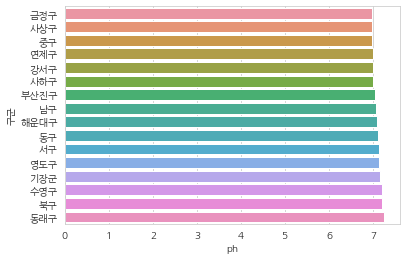

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

water_total_csv = pd.read_csv('D:/Workspace/PythonProjects/csv/water_group.csv',encoding='utf-8-sig')
df_water = pd.DataFrame(water_total_csv)
print(df_water.to_dict('index'))
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x='ph', y='구군', data=df_water.sort_values(by='ph'))
plt.show()
